# 1) Crie um array 7x7 com números inteiros aleatórios. Depois utilize uma condição para substituir os números maiores que 3 e menores que 8 por ‘a’. Printe os dois arrays.


In [2]:
import numpy as np
import random 

In [3]:
array = np.random.randint(0,11,(7,7))
print(array)

[[ 5  5  5  4  7  1  3]
 [ 0  4  2  4  0  1  3]
 [ 7  6  7 10  2  4  3]
 [ 6  5  8  6  3  6 10]
 [10  6  3 10  8  1  5]
 [ 6  7  6  4  6 10  8]
 [ 0  3 10  1  2  4  8]]


In [4]:


array2 = []

for m in range(len(array)):
    for n in range(len(array[m])):
        number = array[m][n]
        if (number> 3) and  (number < 8):
            array2.append("a")
        else:
            array2.append(str(number))
array2 = np.array(array2)
print(np.reshape(array2,(7,7)))

[['a' 'a' 'a' 'a' 'a' '1' '3']
 ['0' 'a' '2' 'a' '0' '1' '3']
 ['a' 'a' 'a' '10' '2' 'a' '3']
 ['a' 'a' '8' 'a' '3' 'a' '10']
 ['10' 'a' '3' '10' '8' '1' 'a']
 ['a' 'a' 'a' 'a' 'a' '10' '8']
 ['0' '3' '10' '1' '2' 'a' '8']]


# Um cliente deseja comprar uma casa no Rio de Janeiro. Suas exigências são: 3 quartos, no bairro Tijuca, área maior que 130m². Mostre a opção mais barata presente na tabela “dados.csv”.

In [5]:
import pandas as pd

data = pd.read_csv('dados.csv')
data = data.loc[(data.quartos == 3 ) & (data.bairro == "Tijuca") & (data.area >130)]
data = data[data.preco == data.preco.min()]
data

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
1971,480,3,1.0,3.0,142,Tijuca,600000,4225.35


# Utilizando a planilha ‘flights.csv’, plote um gráfico mostrando a quantidade de passageiros em cada ano no mês de maio.

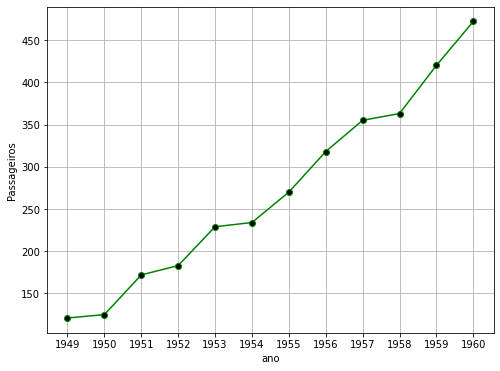

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("flights.csv")
data = data.loc[data.month == "May"]

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)

plt.plot(data.year,data.passengers,marker = 'o',color = 'g',markerfacecolor='black')
plt.xlabel("ano")
plt.ylabel("Passageiros")

plt.xticks( data.year.array)
plt.grid()
plt.show()



# 4) Plote dois gráficos na mesma figura utilizando subplots(), em um gráfico mostre a função f(x)=x², e no outro mostre a função g(x)=x³.

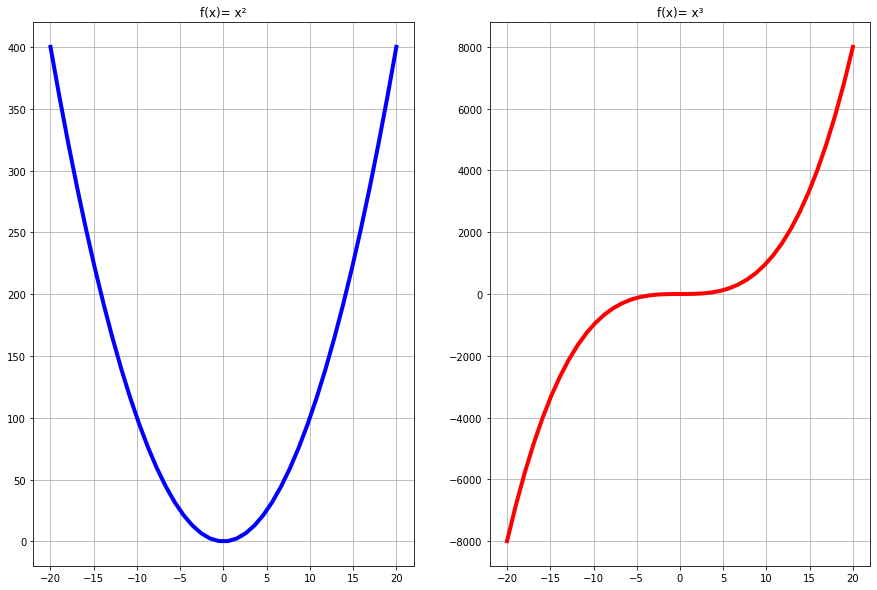

In [1]:
import math
from typing import Callable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def GetInterval(start:int,end:int,step:float, fn:Callable[[float],float]) -> dict[str,list[int]]:
    x = np.linspace(start,end,math.ceil((end-start)/step))
    my_dict = {"X":[],"Y":[]}

    for i in x:
        my_dict["X"].append(i)
        my_dict["Y"].append(fn(i))
    return my_dict

def x2(i)->float:
    return i*i

def x3(i)->float:
    return i*i*i

a  = GetInterval(-20,20,1,x2)
b = GetInterval(-20,20,1,x3)


fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (15,10))
axis[0].plot(a["X"],a["Y"],color='b',linewidth=4)
axis[1].plot(b["X"],b["Y"],color='r',linewidth=4)

axis[0].set_title("f(x)= x²")
axis[1].set_title("f(x)= x³")

axis[0].grid()
axis[1].grid()

plt.show()



# 5) A partir da planilha “flights.csv”, plote um gráfico através da biblioteca seaborn do tipo barras horizontais, em que apresente os meses (eixo Y) e a quantidade de passageiro em cada mês do ano de 1950 (eixo X). A paleta de cores é opcional.

In [8]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("flights.csv") 
data = data.loc[data.year ==1950]

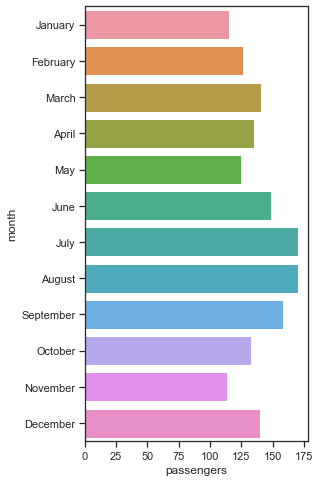

In [12]:
sns.set_style("ticks")
plot = sns.barplot(x = data.passengers,y = data.month)
plot.set_xticks((range(0,176,25)))

sns.set(rc = {'figure.figsize':(6,8)})
plt.show()

# 6) Crie um programa que remova o efeito sal e pimenta da foto “mulher.png”, utilize o filtro que melhor se aplique nessa situação.

In [10]:
import cv2
image = cv2.imread('mulher.png')
image = cv2.medianBlur(image,3)

cv2.imshow("mulher",image)

cv2.waitKey(0) & 0xFF
cv2.destroyAllWindows()

# 7) Crie um programa que pede para o usuário escolher entre 3 efeitos: Luv(BGR2Luv), BGR-HSV, e BGR-RGB. Depois da escolha o programa deve aplicar esse efeito no vídeo ‘flor.mp4’ e salvar em um novo vídeo ‘novo_video.mp4’. Informações importantes: fps: 30, dimensão: 1280x720.

In [11]:
import cv2
opc = int(input("Escolhar um Efeito\n [1] - Luv(BGR2Luv)\n [2] - BGR-HSV\n [3] - BGR-RGB"))
resp = ''

fourcc = cv2.VideoWriter_fourcc(*"XVID")
#
output = cv2.VideoWriter("novo_video.mp4",fourcc,30,(1280,720))
cap = cv2.VideoCapture("flor.mp4")
while cap.isOpened():
    ret,frame = cap.read()

    if ret == False:
        break

    if(opc == 1):
        image_LUC = cv2.cvtColor(frame,cv2.COLOR_BGR2LUV)
        output.write(image_LUC)
        cv2.imshow("frame",image_LUC)
    if opc == 2 :
        image_HSV = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        output.write(image_HSV)
        cv2.imshow("frame",image_HSV)
    if opc == 3 :
        image_RGB = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        output.write(image_RGB)
        cv2.imshow("frame",image_RGB)


    if  cv2.waitKey(1) == ord('q'):
        break;    

output.release()
cap.release()
cv2.destroyAllWindows()